# Data Glacier Preliminary analysis (Data Solver Group)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [20]:
df = pd.read_excel('forecasting_case_study.xlsx')

## Preliminary Analysis (Missing Values, Duplication, Skrewness)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Product             1218 non-null   object        
 1   date                1218 non-null   datetime64[ns]
 2   Sales               1218 non-null   int64         
 3   Price Discount (%)  1218 non-null   float64       
 4   In-Store Promo      1218 non-null   int64         
 5   Catalogue Promo     1218 non-null   int64         
 6   Store End Promo     1218 non-null   int64         
 7   Google_Mobility     1218 non-null   float64       
 8   Covid_Flag          1218 non-null   int64         
 9   V_DAY               1218 non-null   int64         
 10  EASTER              1218 non-null   int64         
 11  CHRISTMAS           1218 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(8), object(1)
memory usage: 114.3+ KB


In [6]:
# Summary statistics
print("\nSummary statistics of the dataset:")
df.describe()


Summary statistics of the dataset:


,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,30294.678982,0.251043,0.472085,0.212644,0.348933,-2.377406,0.226601,0.019704,0.019704,0.018883
std,35032.527297,0.215494,0.499425,0.409346,0.476828,5.806291,0.418804,0.139040,0.139040,0.136169
min,0.000000,0.000000,0.000000,0.000000,0.000000,-28.490000,0.000000,0.000000,0.000000,0.000000
25%,7212.750000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19742.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40282.250000,0.400000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,288322.000000,0.830000,1.000000,1.000000,1.000000,3.900000,1.000000,1.000000,1.000000,1.000000


**Interpretation**

*Sales, Price discount & Google Mobility are continuous data whereas the other columns are categorical data*

In [35]:
grouped_data = df.groupby('Product').sum()
grouped_data

C:\Users\leong\AppData\Local\Temp\ipykernel_23860\2249005263.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df.groupby('Product').sum()


,Sales,Price Discount (%),In-Store Promo,Catalogue Promo,Store End Promo,Google_Mobility,Covid_Flag,V_DAY,EASTER,CHRISTMAS
Product,,,,,,,,,,
SKU1,9694468,22.22,86,18,53,-488.88,47,4,4,4
SKU2,1490152,28.23,63,26,9,-488.88,47,4,4,4
SKU3,11390081,77.84,132,65,130,-488.88,47,4,4,4
SKU4,3463211,71.84,132,65,130,-488.88,47,4,4,4
SKU5,3360089,42.24,80,35,22,-488.88,47,4,4,4
SKU6,7500918,63.40,82,50,81,-451.28,41,4,4,3


**Interpretation**

*There are a total of 6 different products in the dataset*

In [7]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Product               0
date                  0
Sales                 0
Price Discount (%)    0
In-Store Promo        0
Catalogue Promo       0
Store End Promo       0
Google_Mobility       0
Covid_Flag            0
V_DAY                 0
EASTER                0
CHRISTMAS             0
dtype: int64


In [8]:
# Check for duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
0


# Data Visualization & EDA

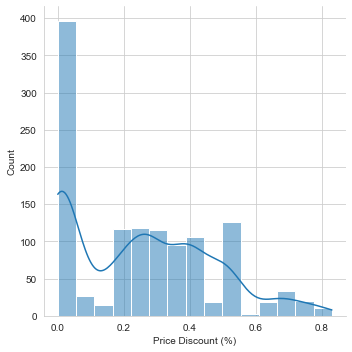

In [17]:
# Check for outlier

sns.displot(df['Price Discount (%)'], kde = True, bins = 15) 

**Interpretation**

*The Price disount (%) is right skrewed, and the dicounts are be mostly divided into between 0.2% to 0.4% and another smaller group from 0.6% to 0.8%*

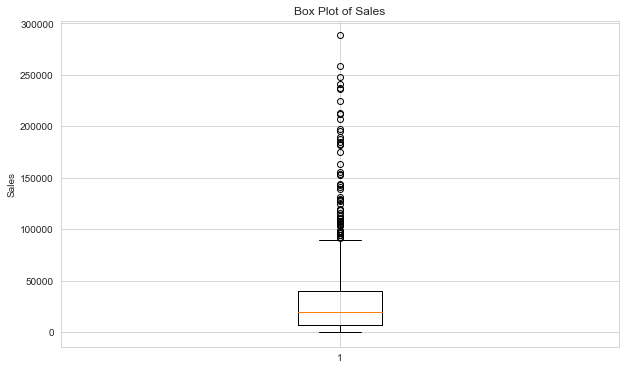

In [18]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Sales'])
plt.title('Box Plot of Sales')
plt.ylabel('Sales')
plt.show()

**Interpretation**

*There are many outliers from the Sales column as expected*

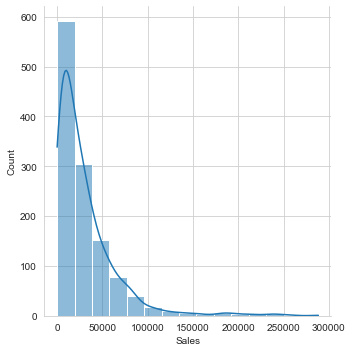

In [24]:
# Check for outlier

sns.displot(df['Sales'], kde = True, bins = 15) 

**Interpretation**

*The boxplot graph also supported that sales are righly skrweed*

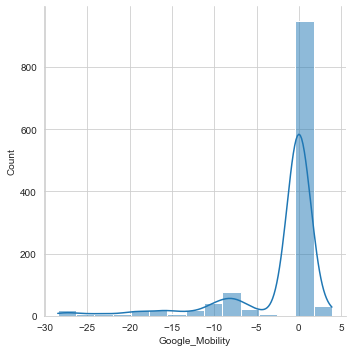

In [30]:
# Check for outlier

sns.displot(df['Google_Mobility'], kde = True, bins = 15) 

**Interpretation**

*More understanding about Google Mobility is requried*

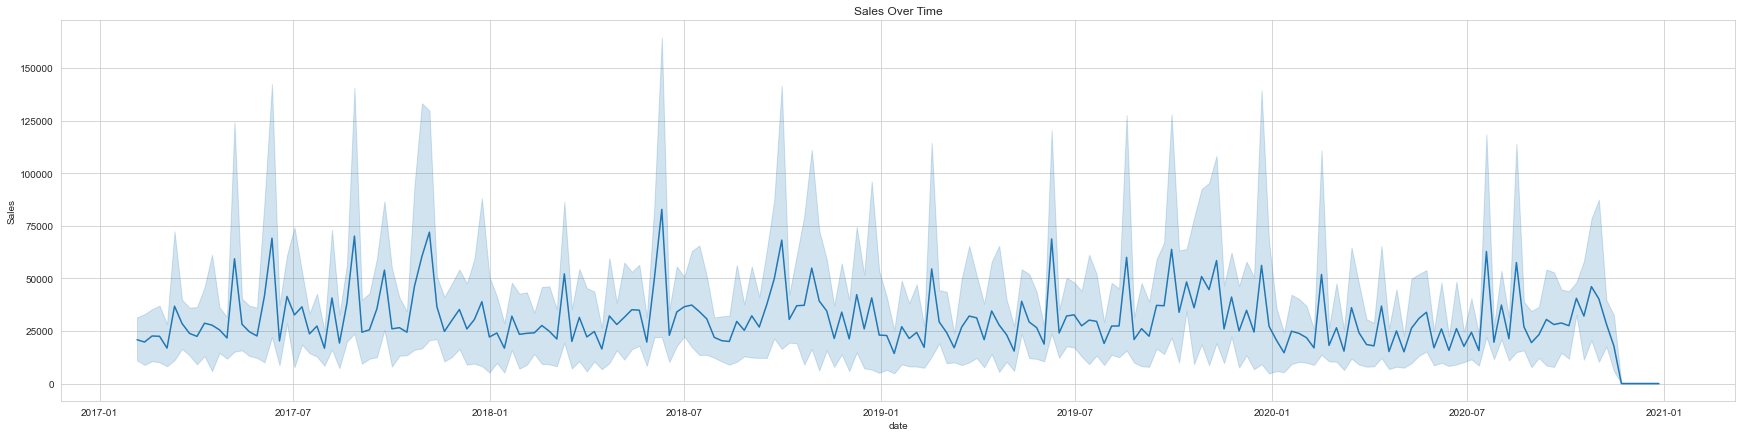

In [33]:
# Visualizing time series data (for further transformation)
if 'date' in df.columns:
    plt.figure(figsize=(30, 7))
    sns.lineplot(data=df, x='date', y='Sales')
    plt.title('Sales Over Time')
    plt.show()

**Interpretation**

*The main noticable spikes are before July in all years excluding 2020*

*Seasonal transformation mught be needed*

*There doesn't seem to have a trend & Cyclical component*

*The dataset seems to be a additive model*

## End